# Figures for publication
This script will reproduce plots used in the publication

In [4]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
 
# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


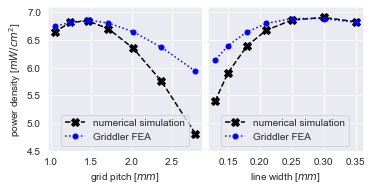

In [12]:
# Optimum wobble: Does the optimum H-bar design identified by gridgraph_numeric also
# correspond to the optimum in Griddler?
# Center point: Rsheet 1000; Pwire 1e-6; Radius 5 cm; Jsol 20 mA/cm2; Voc 0.8V; h_wire 5e-4 cm; pitch_min 1 mm; w_min 1e-4 cm
DIR = '../experiments/April \'22 V .42 rebracket Rsheet'
FILE = 'optimum_wobble.xls'
YLIM = [4.5, 7.1]

sns.set_style('darkgrid')
df = pd.read_excel(os.path.join(DIR, FILE))

knockdown = df['Griddler W/cm2'].iloc[0] / df['W/cm2'].iloc[0]
knockdown = 1.53

fig, axs = plt.subplots(1, 2, figsize=(5, 2.5), constrained_layout=True, sharey=True)

# Plot sensitivity to Pitch
idxs = np.arange(1, 8)
x = df['pitch'].iloc[idxs] * 10  # cm to mm
y1 = df['W/cm2'].iloc[idxs] * knockdown * 1e3  # scale to match center point
y2 = df['Griddler W/cm2'].iloc[idxs] * 1e3
axs[0].plot(x, y1, marker='X', markersize=8,
            ls='--', color='black')
axs[0].plot(x, y2, marker='o', markersize=5,
            ls=':', color='blue')
axs[0].set_ylim(YLIM)
axs[0].legend(('numerical simulation', 'Griddler FEA'), loc='lower center')

axs[0].set_xlabel('grid pitch [$mm$]')
axs[0].set_ylabel('power density [$mW/cm^2$]')


# Plot sensitivity to Width
idxs = np.arange(8, 15)
x = df['width'].iloc[idxs] * 10
y1 = df['W/cm2'].iloc[idxs] * knockdown * 1e3
y2 = df['Griddler W/cm2'].iloc[idxs] * 1e3
axs[1].plot(x, y1, marker='X', markersize=8,
            ls='--', color='black')
axs[1].plot(x, y2, marker='o', markersize=5,
            ls=':', color='blue')
axs[1].set_ylim(YLIM)
axs[1].legend(('numerical simulation', 'Griddler FEA'), loc='lower center')

axs[1].set_xlabel('line width [$mm$]')

# fig.suptitle('5cm solar cell power with an H-bar grid design')

plt.savefig(os.path.join(DIR, 'wobble_fig_cor_' + str(knockdown) + '.png'), dpi=400)

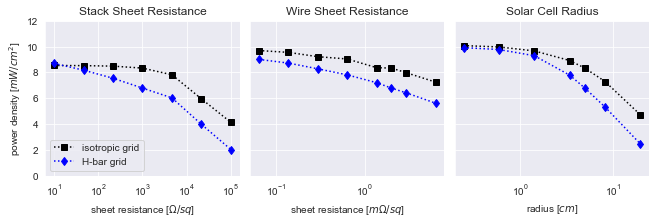

In [41]:
# Comparison: Under what conditions do isotropic grids outperform H-bar?
# Center point: Rsheet 1000; Pwire 1e-6; Radius 5 cm; Jsol 20 mA/cm2; Voc 0.8V; h_wire 5e-4 cm; pitch_min 1 mm; w_min 1e-4 cm
FILE = 'results.xls'
YLIM = [0, 12]
INCLUDE_BUS = False

sns.set_style('darkgrid')
df = pd.read_excel(os.path.join(DIR, FILE))

griddler_H_column = 'Griddler Hbar mW/cm2'
griddler_iso_column = 'Griddler Iso mW/cm2'
griddler_Hbus_column = 'Griddler Bus H mW/cm2'

# sim_H_column = 'H-Bar mW/cm2'
# sim_iso_column = 'Isotropic mW/cm2'
# sim_Hbus_column = 'Bus H-Bar mW/cm2'


knockdown_H = df[griddler_H_column].iloc[0] / df[sim_H_column].iloc[0]
knockdown_iso = df[griddler_iso_column].iloc[0] / df[sim_iso_column].iloc[0]

knockdown_H = np.mean((knockdown_H, knockdown_iso))
knockdown_iso = knockdown_H

def plot_trend(idxs, x_name, ax):
    x = df[x_name].iloc[idxs]  # Ohms/sq
#     iso = df[sim_iso_column].iloc[idxs] * knockdown_iso  # scale to match center point
#     hbar = df[sim_H_column].iloc[idxs] * knockdown_H
    iso_val = df[griddler_iso_column].iloc[idxs]
    hbar_val = df[griddler_H_column].iloc[idxs]

    ax.semilogx(x, iso_val, marker='s', markersize=6,
                ls=':', color='black')
    ax.semilogx(x, hbar_val, marker='d', markersize=6,
                ls=':', color='blue')
    if INCLUDE_BUS:
        bus_val = df[griddler_Hbus_column].iloc[idxs]
        ax.semilogx(x, bus_val, marker='x', markersize=6,
                    ls=':', color='red')
        

fig, axs = plt.subplots(1, 3, figsize=(9, 3), constrained_layout=True, sharey=True)

# Plot grid comparison over Rsheet
idxs = np.arange(1, 8)
plot_trend(idxs, 'Rsheet ohm/sq', axs[0])
if INCLUDE_BUS:
    axs[0].legend(('isotropic grid', 'H-bar grid', 'Variable bus grid'), loc='lower left')
else:
    axs[0].legend(('isotropic grid', 'H-bar grid'), loc='lower left')
axs[0].set_ylim(YLIM)
axs[0].set_xlabel('sheet resistance [$\Omega/sq$]')
axs[0].set_ylabel('power density [$mW/cm^2$]')
axs[0].set_title('Stack Sheet Resistance')


# Plot grid comparison over Rwire
idxs = np.arange(8, 16)
plot_trend(idxs, 'Rwire mohm/sq', axs[1])
axs[1].set_xlabel('sheet resistance [$m\Omega/sq$]')
axs[1].set_title('Wire Sheet Resistance')


# Plot grid comparison over Radius
idxs = np.arange(16, 23)
plot_trend(idxs, 'R cm', axs[2])
axs[2].set_xlabel('radius [$cm$]')
axs[2].set_title('Solar Cell Radius')


plt.savefig(os.path.join(DIR, 'HvsIso_fig_cor_' + str(knockdown_H) + '.png'), dpi=500)

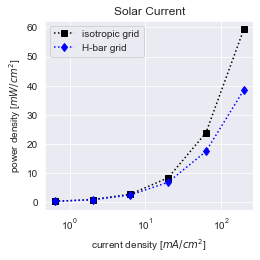

In [40]:
# Solar Current Walk
# Plot grid comparison over Jsol
fig, axs = plt.subplots(1, 1, figsize=(3.5, 3.5), constrained_layout=True)

idxs = np.arange(24, 30)
plot_trend(idxs, 'Jsol mA/cm2', axs)

axs.set_xlabel('current density [$mA/cm^2$]')
axs.set_ylabel('power density [$mW/cm^2$]')
axs.set_title('Solar Current')

if INCLUDE_BUS:
    axs.legend(('isotropic grid', 'H-bar grid', 'Variable bus grid'), loc='upper left')
else:
    axs.legend(('isotropic grid', 'H-bar grid'), loc='upper left')

plt.savefig(os.path.join(DIR, 'Jsol_HvsIso_fig_cor_' + str(knockdown_H) + '.png'), dpi=500)

In [ ]:
# Fin